# TITANIC SURVIVAL PREDICTION

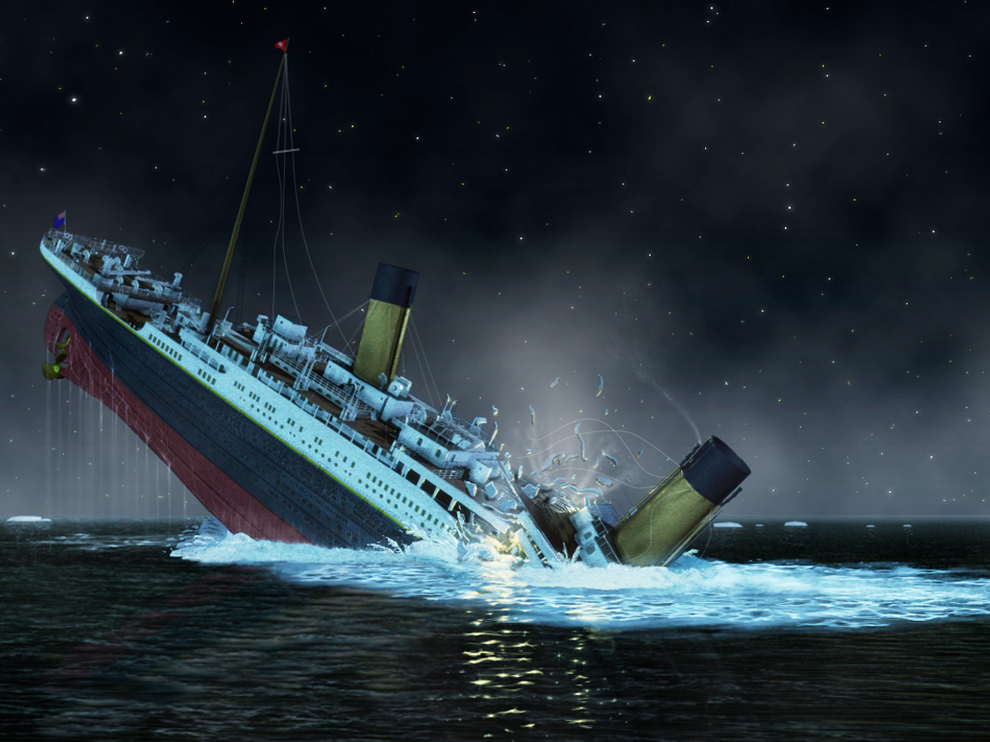

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv("C:\\Users\\hp\\OneDrive\\Desktop\\CodSoft_Internship_Projects\\Titanic-Dataset.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [51]:
train = pd.read_csv('C:\\Users\\hp\\OneDrive\\Desktop\\CodSoft_Internship_Projects\\Titanic-dataset.csv') 
test = pd.read_csv('C:\\Users\\hp\\OneDrive\\Desktop\\CodSoft_Internship_Projects\\Titanic-dataset.csv') 

# To know number of columns and rows 
train.shape 

(891, 12)

In [52]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [53]:
train.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Visualization

<Axes: xlabel='Survived', ylabel='count'>

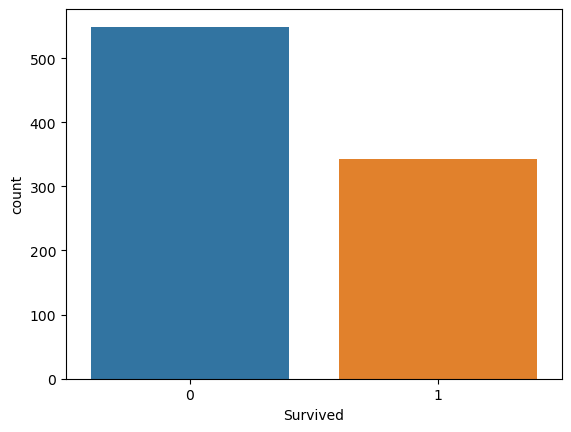

In [69]:
sns.countplot(x = 'Survived' , data=data)

<Axes: xlabel='Survived', ylabel='count'>

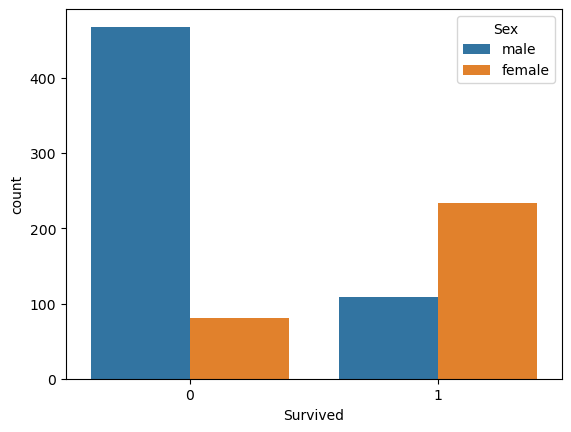

In [72]:
sns.countplot(x = 'Survived' , data=data ,hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

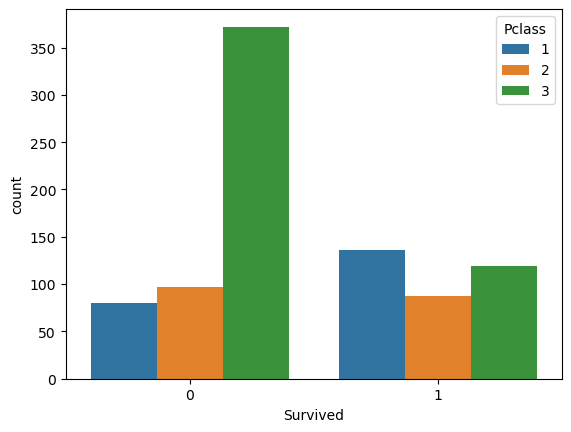

In [73]:
sns.countplot(x = 'Survived' , data=data ,hue='Pclass')

<Axes: >

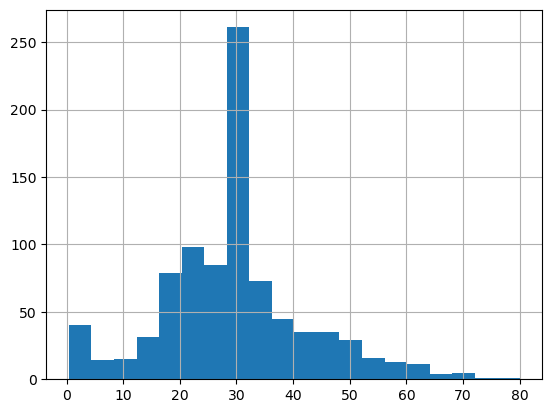

In [74]:
data['Age'].hist(bins=20)

# Feature Engineering

Now let’s see which columns should we drop and/or modify for the model to predict the testing data. The main tasks in this step is to drop unnecessary features and to convert string data into the numerical category for easier training.

We’ll start off by dropping the Cabin feature since not a lot more useful information can be extracted from it. But we will make a new column from the Cabins column to see if there was cabin information allotted or not.

In [56]:
# Create a new column cabinbool indicating 
# if the cabin value was given or was NaN 
train["CabinBool"] = (train["Cabin"].notnull().astype('int')) 
test["CabinBool"] = (test["Cabin"].notnull().astype('int')) 

# Delete the column 'Cabin' from test 
# and train dataset 
train = train.drop(['Cabin'], axis=1) 
test = test.drop(['Cabin'], axis=1)

In [57]:
train = train.drop(['Ticket'], axis=1) 
test = test.drop(['Ticket'], axis=1) 

In [58]:
# replacing the missing values in 
# the Embarked feature with S 
train = train.fillna({"Embarked": "S"}) 

We will now sort the age into groups. We will combine the age groups of the people and categorize them into the same groups. BY doing so we will be having fewer categories and will have a better prediction since it will be a categorical dataset.

In [59]:
# sort the ages into logical categories 
train["Age"] = train["Age"].fillna(-0.5) 
test["Age"] = test["Age"].fillna(-0.5) 
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf] 
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 
		'Student', 'Young Adult', 'Adult', 'Senior'] 
train['AgeGroup'] = pd.cut(train["Age"], bins, labels=labels) 
test['AgeGroup'] = pd.cut(test["Age"], bins, labels=labels) 

In the ‘title’ column for both the test and train set, we will categorize them into an equal number of classes. Then we will assign numerical values to the title for convenience of model training.

In [60]:
# create a combined group of both datasets 
combine = [train, test] 

# extract a title for each Name in the 
# train and test datasets 
for dataset in combine: 
	dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False) 

pd.crosstab(train['Title'], train['Sex']) 

# replace various titles with more common names 
for dataset in combine: 
	dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col', 
												'Don', 'Dr', 'Major', 
												'Rev', 'Jonkheer', 'Dona'], 
												'Rare') 

	dataset['Title'] = dataset['Title'].replace( 
		['Countess', 'Lady', 'Sir'], 'Royal') 
	dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss') 
	dataset['Title'] = dataset['Title'].replace('Ms', 'Miss') 
	dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs') 

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean() 

# map each of the title groups to a numerical value 
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, 
				"Master": 4, "Royal": 5, "Rare": 6} 
for dataset in combine: 
	dataset['Title'] = dataset['Title'].map(title_mapping) 
	dataset['Title'] = dataset['Title'].fillna(0) 

Now using the title information we can fill in the missing age values.

In [61]:
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() # Young Adult 
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() # Student 
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() # Adult 
master_age = train[train["Title"] == 4]["AgeGroup"].mode() # Baby 
royal_age = train[train["Title"] == 5]["AgeGroup"].mode() # Adult 
rare_age = train[train["Title"] == 6]["AgeGroup"].mode() # Adult 

age_title_mapping = {1: "Young Adult", 2: "Student", 
					3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"} 

for x in range(len(train["AgeGroup"])): 
	if train["AgeGroup"][x] == "Unknown": 
		train["AgeGroup"][x] = age_title_mapping[train["Title"][x]] 

for x in range(len(test["AgeGroup"])): 
	if test["AgeGroup"][x] == "Unknown": 
		test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]

Now assign a numerical value to each age category. Once we have mapped the age into different categories we do not need the age feature. Hence drop it

In [62]:
# map each Age value to a numerical value 
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 
			'Student': 4, 'Young Adult': 5, 'Adult': 6, 
			'Senior': 7} 
train['AgeGroup'] = train['AgeGroup'].map(age_mapping) 
test['AgeGroup'] = test['AgeGroup'].map(age_mapping) 

train.head() 

# dropping the Age feature for now, might change 
train = train.drop(['Age'], axis=1) 
test = test.drop(['Age'], axis=1) 

Drop the name feature since it contains no more useful information.

In [63]:
train = train.drop(['Name'], axis=1) 
test = test.drop(['Name'], axis=1) 

Assign numerical values to sex and embarks categories

In [64]:
sex_mapping = {"male": 0, "female": 1} 
train['Sex'] = train['Sex'].map(sex_mapping) 
test['Sex'] = test['Sex'].map(sex_mapping) 

embarked_mapping = {"S": 1, "C": 2, "Q": 3} 
train['Embarked'] = train['Embarked'].map(embarked_mapping) 
test['Embarked'] = test['Embarked'].map(embarked_mapping) 

Fill in the missing Fare value in the test set based on the mean fare for that P-class

In [65]:
for x in range(len(test["Fare"])): 
	if pd.isnull(test["Fare"][x]): 
		pclass = test["Pclass"][x] # Pclass = 3 
		test["Fare"][x] = round( 
			train[train["Pclass"] == pclass]["Fare"].mean(), 4) 

# map Fare values into groups of 
# numerical values 
train['FareBand'] = pd.qcut(train['Fare'], 4, 
							labels=[1, 2, 3, 4]) 
test['FareBand'] = pd.qcut(test['Fare'], 4, 
						labels=[1, 2, 3, 4]) 

# drop Fare values 
train = train.drop(['Fare'], axis=1) 
test = test.drop(['Fare'], axis=1) 

# Model Training

In [66]:
from sklearn.model_selection import train_test_split 

# Drop the Survived and PassengerId 
# column from the trainset 
predictors = train.drop(['Survived', 'PassengerId'], axis=1) 
target = train["Survived"] 
x_train, x_val, y_train, y_val = train_test_split( 
	predictors, target, test_size=0.2, random_state=0) 

In [67]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score 

randomforest = RandomForestClassifier() 

# Fit the training data along with its output 
randomforest.fit(x_train, y_train) 
y_pred = randomforest.predict(x_val) 

# Find the accuracy score of the model 
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2) 
print(acc_randomforest) 


84.36
